<a href="https://colab.research.google.com/github/ManoloSampaio/ControlHomeworks/blob/master/Homework1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Homework 1
-----
### Student Name: Emmanuel Sampaio.

# **Install the packages**

In [3]:
## Install the control lab in the Lab.
!pip install control

     |████████████████████████████████| 256kB 1.4MB/s 
  Created wheel for control: filename=control-0.8.3-py2.py3-none-any.whl size=260982 sha256=f5dbc9264a45c489663495a9a14d8bda496683734bd224e4a8b65e0db9f81661
  Stored in directory: /root/.cache/pip/wheels/c2/d9/cc/90b28cb139a6320a3af2285428b6da87eee8d8920c78bb0223
Successfully built control


In [0]:
import control as ctrl
import control.matlab as ctrlmatlab
import matplotlib.pyplot as plt
import numpy as np
from scipy import signal as sg
import sympy as sp

# **Exercise 1**
Consider the two tanks system arranged as shown in Figure :<br>
![alt text](https://drive.google.com/uc?id=1ZuWvdmjkO5knB-O12N3yoDYu945qCQ4l)


The manipulated variable (input) is the volume flow rate $q_{in}$, while the measured variable (output) is the fluid level $h_2$ in the second tank.
The areas of the two tanks are  $A_1$ and $A_2$, while $a_{12}, a_{13}$ and $a_{23}$ are the areas of the orifices indicated in the Figure. The fluid is perfect (no shear stresses, no viscosity, no heat conduction), and subject only to gravity. The tanks are filled with water (incompressible fluid), and the external pressure is constant (atmospheric pressure).

---
1. Obtain a state-space model of the systzem, where $x_1(t)=h_1(t)$ and $x_2(t)=h_2(t)$ are state variables, $u(t)=q_{in}(t)$ is the input and $y(t)=h_2(t)$ is the output. 
2. Given $a_{12}=a_{23}=a_{13}= 1$ m$^2$, $A_1=200$ m$^2$, $A_2=200$ m$^2$, find the equilibrium state $(\bar{x}_1,\bar{x}_2)$ obtained with a constant input $\bar{u}=10$ m$^3/$s, approximating gravity acceleration as $g\approx 10$ m/s$^2$.
3. Determine the linearized system $(\mathbf{A},\mathbf{B},\mathbf{C},\mathbf{D})$ around the equilibrium state $(\bar{x}_1,\bar{x}_2)$.
4. In the programming language of your choice, simulate the two systems model response to a unit input step and discuss your results.


## Nonlinear equation
The nonlinear equations are:
$$\frac{dh_1(t)}{dt} = \frac{1}{A_1}q_{in}-\frac{1}{A_1}a_{12}\sqrt{2gh_1}-\frac{1}{A_1}a_{13}\sqrt{2gh_1}$$<br>
$$\frac{dh_2(t)}{dt} = \frac{1}{A_2} a_{12}\sqrt{2gh_1}-\frac{1}{A_2}a_{23}\sqrt{2gh_2}$$
The following code implement the simulation of this nonlinear equation.

In [0]:
def nonlineartank(x,t,params):
  [x1,x2]=x
  [A1,A2,u,mi1,mi2,mi3,g] = params
  f1 = (1/A1)*(u-2*mi1*((2*g*x1)**(0.5)))
  f2 = (1/A2)*((mi1*((2*g*x1)**0.5))-(mi2*((2*g*x2)**0.5)))
  dx =[f1,f2]
  return dx

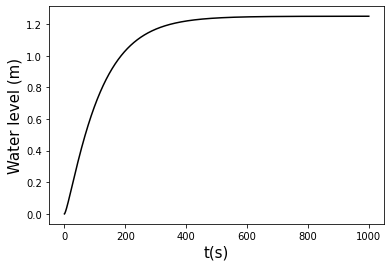

In [6]:
from scipy.integrate import odeint
T=np.arange(0,1000,0.001)
A1 =200 # Cross sectional area.
A2 =200 # Cross sectional area.
mi1 = 1 # Cross sectional area of the pipe between tank 1 and 2.
mi2 = 1 # Cross sectional area of the pipe between tank 1 and out.
mi3 = 1 # Cross sectional area of the pipe between tank 2 and out.
g = 10 # Gravity value.
u = 10 # Magnitude of the step.
yode=odeint(nonlineartank,[0,0],T,args=([A1,A2,u,mi1,mi2,mi3,g],)) #Output of the nonlinear model.
plt.plot(T,yode[:,1],'k') # Ploting the h(t).
plt.xlabel('t(s)',fontsize=15)
plt.ylabel('Water level (m)',fontsize=15)
plt.rcParams["figure.figsize"] = (10,10)
plt.savefig('Question1Nonlinear.eps', format='eps')

## **Linear model**

$$\begin{bmatrix}
\frac{d h_1}{dt}\\
\frac{d h_2}{dt}
\end{bmatrix}=\begin{bmatrix}
-0.02 & 0\\
0.01 & -0.01\\
\end{bmatrix}
\begin{bmatrix}
h_1(t) - 1.25\\
h_2(t) -1.25
\end{bmatrix}
+\begin{bmatrix}
0.005\\
0
\end{bmatrix}(q_{in}(t)-10)$$<br>
$$y(t) = \begin{bmatrix}
0& 1
\end{bmatrix}\begin{bmatrix}
h_1(t)-1.25\\
h_2(t)-1.25
\end{bmatrix}$$


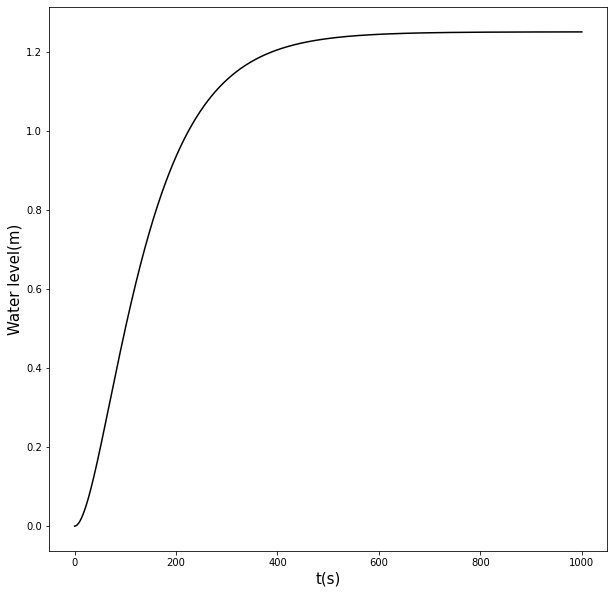

In [7]:
A = np.matrix([[-0.02,0],[0.01,-0.01]])
B = np.matrix([[5*(10**-3)],[0]])
C = np.matrix([0,1])
D = 0
sys = ctrl.ss(A,B,C,D)
T=np.arange(0,1000,0.001)
U = 10*np.ones_like(T)-10*np.ones_like(T)
y=ctrlmatlab.lsim(sys,U,T,[-1.25,-1.25])
y = np.array(y[0])
plt.plot(T,y+1.25*np.ones_like(y),'k')
plt.xlabel('t(s)',fontsize=15)
plt.ylabel('Water level(m)',fontsize=15)
plt.rcParams["figure.figsize"] = (10,10)
plt.savefig('Question1Linear.eps', format='eps')

## **Compare the two models**

In [0]:
def linearmodel(u):
  A = np.matrix([[-0.02,0],[0.01,-0.01]])
  B = np.matrix([[5*(10**-3)],[0]])
  C = np.matrix([0,1])
  D = 0
  sys = ctrl.ss(A,B,C,D)
  T=np.arange(0,1000,0.001)
  U = u*np.ones_like(T)-10*np.ones_like(T)
  y=ctrlmatlab.lsim(sys,U,T,[-1.25,-1.25])
  y = np.array(y[0])
  return (y+1.25)
def nonlinearmodel(u):
  T=np.arange(0,1000,0.001)
  A1 =200
  A2 =200
  mi1 = 1
  mi2 = 1
  mi3 = 1
  g = 10
  yode=odeint(nonlineartank,[0,0],T,args=([A1,A2,u,mi1,mi2,mi3,g],))
  return yode

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


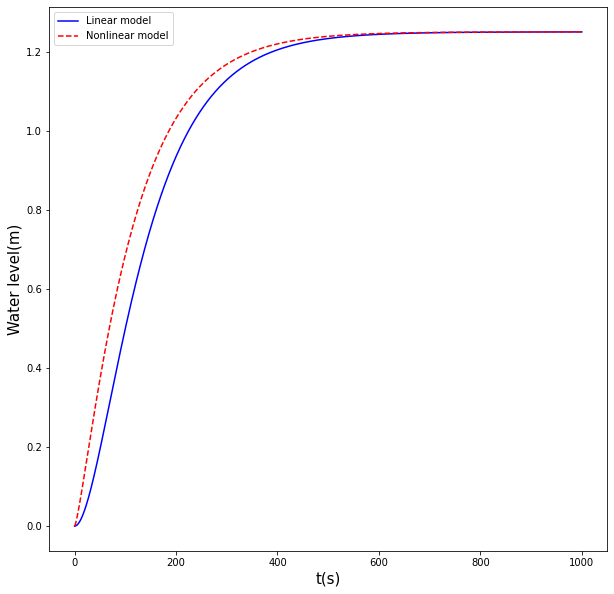

In [9]:
y = linearmodel(10)
yode= nonlinearmodel(10)
plt.plot(T,y,'b',label="Linear model")
plt.plot(T,yode[:,1],'--r',label="Nonlinear model")
plt.xlabel('t(s)',fontsize=15)
plt.ylabel('Water level(m)',fontsize=15)
#plt.rcParams["figure.figsize"] = (10,10)
plt.legend()
plt.savefig('Compare.eps', format='eps')

## **Avaliate the model**

### **The Mean square error** 

In [0]:
def Immse(yode,y):
  mse = 0
  for i in range(0,len(yode)):
    mse = (yode[i,1]-y[i])**2+mse
  mse = mse/len(yode[:,1])
  return mse

### **Avaliate the model in the plots:**

In [11]:
y = linearmodel(10)
yode= nonlinearmodel(10)
Immse(yode,y)

0.005118364763179614

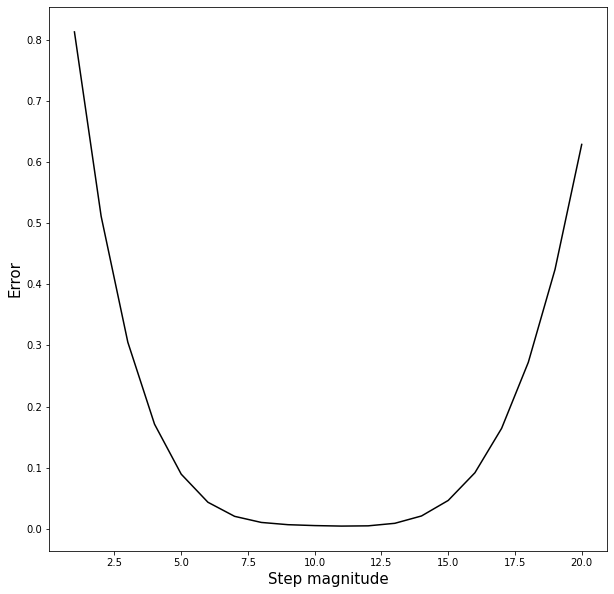

In [12]:
U = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
msevector = []
for u in U:
  yode = nonlinearmodel(u)
  y = linearmodel(u)
  msevector.append(Immse(yode,y))
plt.plot(U,msevector,'k')
plt.xlabel("Step magnitude",fontsize=15)
plt.ylabel("Error",fontsize=15)
plt.rcParams["figure.figsize"] = (10,10)
plt.savefig('Error.eps', format='eps')

# **Exercise 2**

Consider the input-output model:
$$\cfrac{d^2y(t)}{dt^2}+4\cfrac{dy(t)}{dt}+5y(t)=\cfrac{du(t)}{dt}+5u(t)$$


### 

## Code to find the inverse laplace transform of the free response and the forced response

In [0]:
import sympy as sp
s, t,alfa = sp.symbols('s,t,alfa')
t = sp.Symbol('t', positive=True)

In [14]:
expression = (2*s+9)/(s**2+4*s+5)
print(sp.inverse_laplace_transform(expression, s, t))
expression = (s+5)/(s*(s**2+4*s+5))
print(sp.inverse_laplace_transform(expression,s,t))

(5*sin(t) + 2*cos(t))*exp(-2*t)
1 - exp(-2*t)*sin(t) - exp(-2*t)*cos(t)


## Forced response:

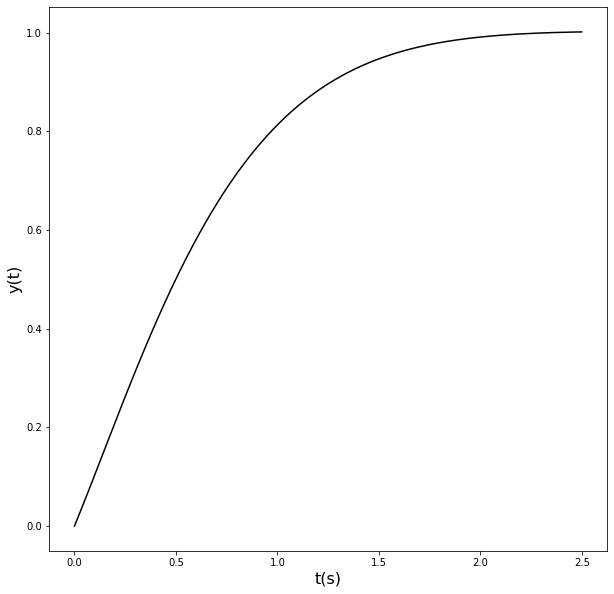

In [37]:
sysforced=ctrl.tf([1,5],[1,4,5])
T = np.arange(0,2.5,0.001)
Time,yforced=ctrl.step_response(sysforced,T)
plt.plot(Time,yforced,'k')
plt.xlabel('t(s)',fontsize=16)
plt.ylabel('y(t)',fontsize=16)
plt.rcParams["figure.figsize"] = (10,10)
plt.savefig('Question2firstitem.eps', format='eps')

## Free response:

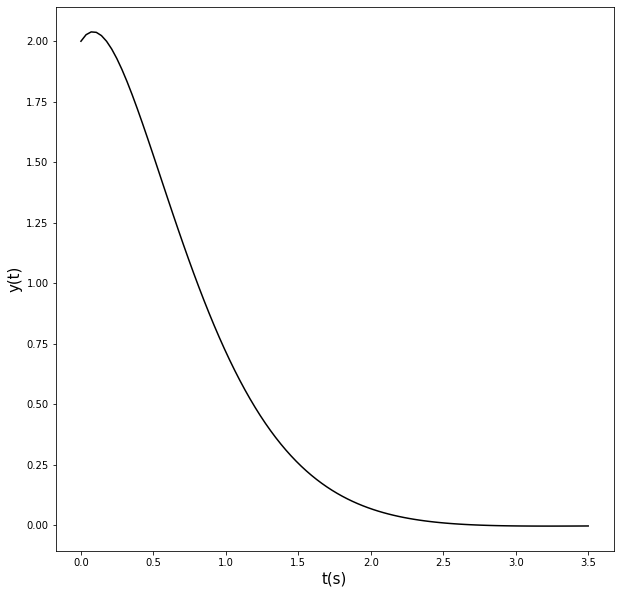

In [16]:
sysfree=ctrl.tf([2,9],[1,4,5])
Time,yfree=ctrl.impulse_response(sysfree)
plt.plot(Time,yfree,'k')
plt.xlabel('t(s)',fontsize=15)
plt.ylabel('y(t)',fontsize=15)
plt.rcParams["figure.figsize"] = (10,10)
plt.rc('legend', fontsize=15)
plt.savefig('Question2seconditem.eps', format='eps')

## **System response**:

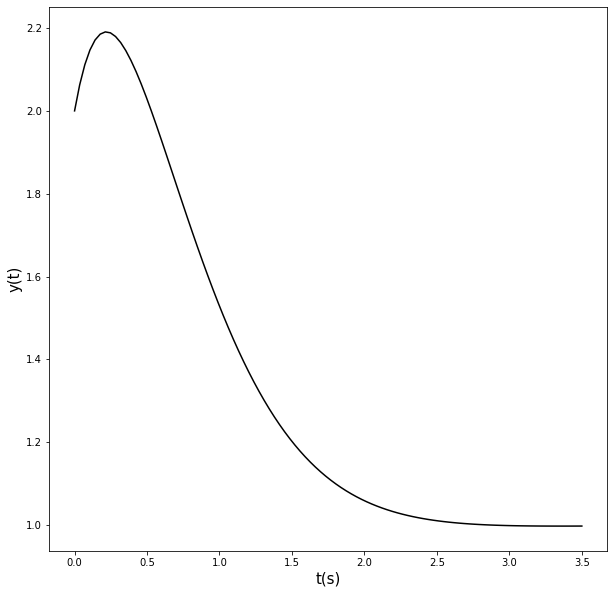

In [17]:
sysfree=ctrl.tf([2,9],[1,4,5])
sysforced=ctrl.tf([1,5],[1,4,5])
Time,yfree=ctrl.impulse_response(sysfree)
Time,yforced=ctrl.step_response(sysforced)
y = yforced+yfree
plt.plot(Time,y,'k')
plt.xlabel('t(s)',fontsize=15)
plt.ylabel('y(t)',fontsize=15)
plt.rcParams["figure.figsize"] = (20,20)
plt.savefig('Question2lastitem.eps', format='eps')

## **Double Checking the equations funded**:

### Forced response:
$$y_f(t) = 1-1.41e^{-2t}(\cos(t-0.785))$$

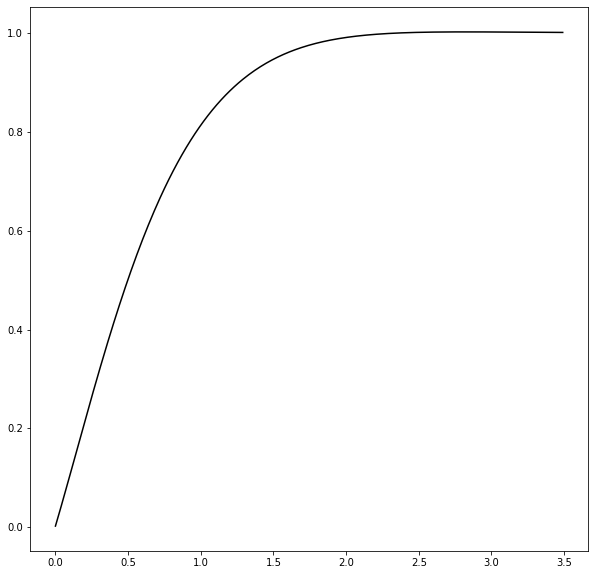

In [41]:
t= np.arange(0,3.5,0.01)
yf = 1-(1.41*np.exp(-2*t)*(np.cos(t-0.785)))
plt.plot(t,yf,'k')

## Free response:

$$y_0(t) =5.38e^{-2t}\cos(t-1.19)$$

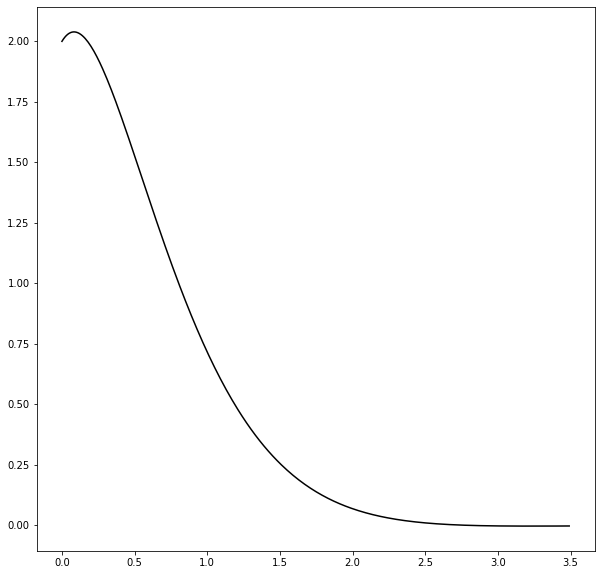

In [42]:
t= np.arange(0,3.5,0.01)
yfr=5.38*np.exp(-2*t)*np.cos(t-1.19)
plt.plot(t,yfr,'k')

### System output

$$y(t) = 1+5.38e^{-2t}\cos(t-1.19)-1.41e^{-2t}(\cos(t-0.785))$$

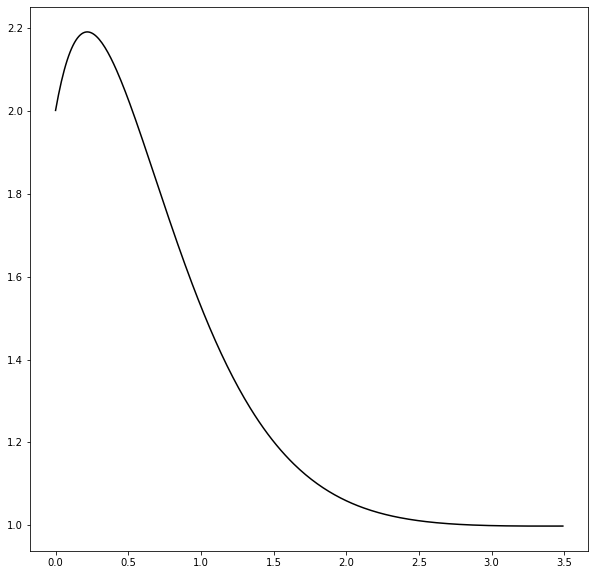

In [40]:
t= np.arange(0,3.5,0.01)
y = 1+(5.38*np.exp(-2*t)*np.cos(t-1.19))-(1.41*np.exp(-2*t)*np.cos(t-0.785))
plt.plot(t,y,'k')

# **Exercise 3**
For a system with the transfer function above
$$G(s)=\cfrac{\alpha s^2 +s+3}{s^2+2s+10}$$
  
----

1. For $\alpha=1$, find and plot the unit step and impulse responses.
2. For $\alpha=[-2, \ -1, \ 0, \ 1, \ 2]$, plot and compare the unit step response.
3. Discuss how the system varies its response for the different values of $\alpha$.


## Finding the inverse laplace transform for the impulse and setp response.

In [0]:
import sympy as sp
s, t,alfa = sp.symbols('s,t,alfa')
t = sp.Symbol('t', positive=True)

In [19]:
expression = (s+7)/(s**2+2*s+10)
sp.inverse_laplace_transform(expression, s, t)

(2*sin(3*t) + cos(3*t))*exp(-t)

In [20]:
expression = (s+7)/(s*(s**2+2*s+10))
sp.inverse_laplace_transform(expression, s, t)

7*(1 - 3*I)**3*(1 + 3*I)**3/10000 + (1 - 3*I)**3*(1 + 3*I)**3*exp(-t)*sin(3*t)/10000 - 7*(1 - 3*I)**3*(1 + 3*I)**3*exp(-t)*cos(3*t)/10000

## Step response of the first item:

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


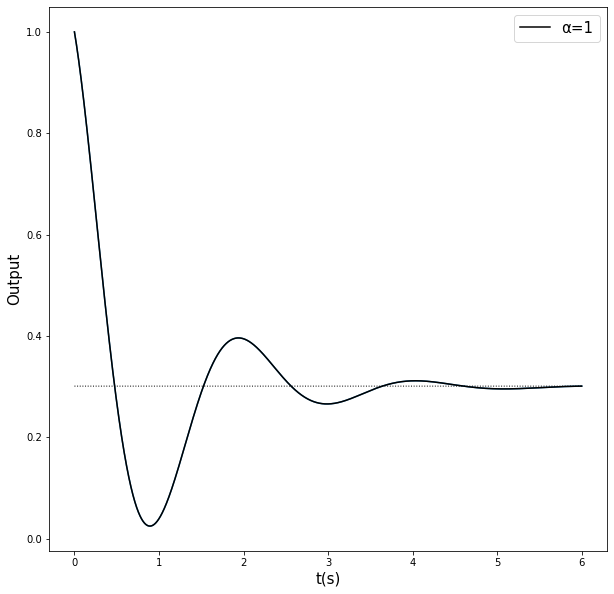

In [38]:
sys3 = ctrl.tf([1,1,3],[1,2,10])
T = np.arange(0,6,0.00001)
Time,Y = ctrl.step_response(sys3,T)
plt.plot(Time,Y)
label = str("\u03B1="+str(1))
plt.plot(Time,Y,'k',label=label)
size = len(T)
plt.plot(Time,Y[len(Y)-1]*np.ones(size),':k',linewidth=1)
plt.xlabel('t(s)',fontsize=15)
plt.ylabel('Output',fontsize=15)
plt.rcParams["figure.figsize"] = (10,10)
plt.rc('legend', fontsize=15)
plt.legend()
plt.savefig('3stepresponse.eps', format='eps')
plt.show()

## **Impulse response for the first item**

/usr/local/lib/python3.6/dist-packages/control/timeresp.py:791: UserWarning: System has direct feedthrough: ``D != 0``. The infinite impulse at ``t=0`` does not appear in the output.
Results may be meaningless!
  warnings.warn("System has direct feedthrough: ``D != 0``. The "


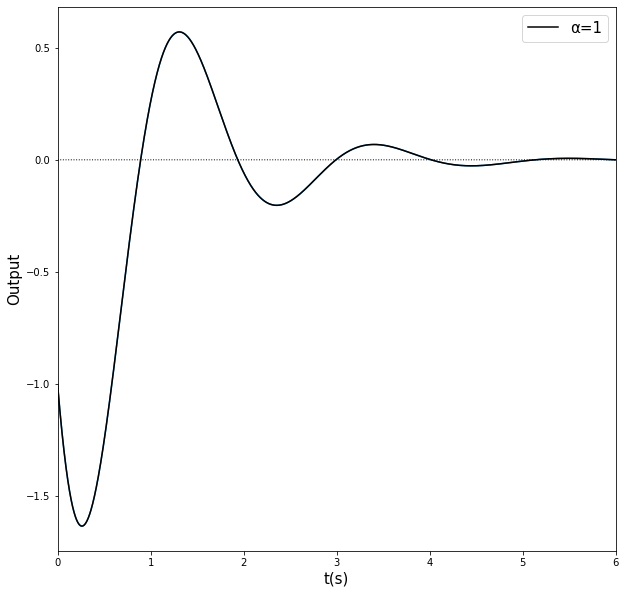

In [22]:
sys3 = ctrl.tf([1,1,3],[1,2,10])
T = np.arange(0,6,0.00001)
Time,Y = ctrl.impulse_response(sys3,T)
plt.plot(Time,Y)
size = len(Time)
size2 = len(Y)
plt.plot(Time,Y[len(Y)-1]*np.ones(size),':k',linewidth=1)
label = str("\u03B1="+str(1))
left, right = plt.xlim()
plt.xlim(left=0)
plt.xlim(right=6)
plt.plot(Time,Y,'k',label=label)
plt.xlabel('t(s)',fontsize=15)
plt.ylabel('Output',fontsize=15)
plt.rcParams["figure.figsize"] = (10,10)
plt.rc('legend', fontsize=15)
plt.legend()
#plt.savefig('3impulseResponse.eps', format='eps')

## **Third item multiple step response**

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


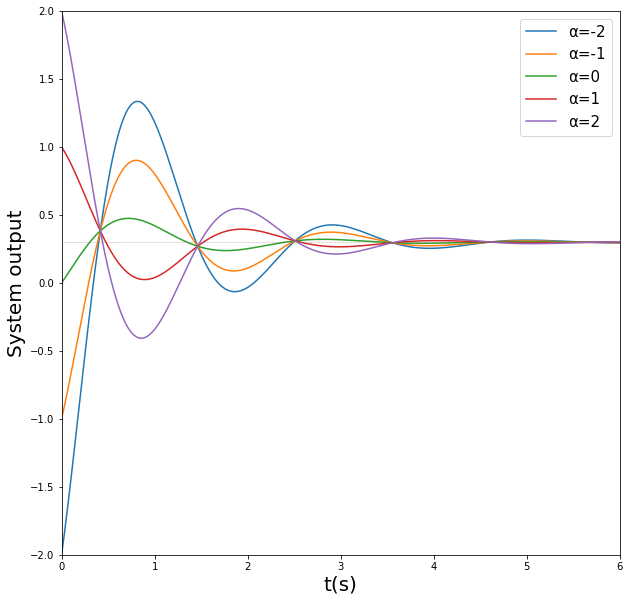

In [23]:
vector = [-2,-1,0,1,2]
for x in vector:
  T = np.arange(0,6,0.00001)
  sys3 = ctrl.tf([x,1,3],[1,2,10])
  Time,Y = ctrl.step_response(sys3,T)
  label = str("\u03B1="+str(x))
  plt.plot(Time,Y,label=label)
  left, right = plt.xlim()
  plt.xlim(left=0)
  plt.xlim(right=6)
  bottom, top = plt.ylim()
  plt.ylim(top=2)
  plt.ylim(bottom=-2)
  plt.xlabel('t(s)',fontsize=20)
  plt.ylabel('System output',fontsize=20)
  plt.rcParams["figure.figsize"] = (10,10)
  plt.rc('legend', fontsize=15)
  plt.legend()
Tempo = np.arange(0,6,1)
size = len(Tempo)
plt.plot(Tempo,Y[len(Y)-1]*np.ones(size),':',linewidth=0.5)
plt.savefig('Question3seconditem.eps', format='eps')

# **Exercise 4**
Given the state-space model:<br>
\begin{cases}
\begin{bmatrix}
\dot{x}_1(t)\\
\dot{x}_2(t)
\end{bmatrix}
& =
\begin{bmatrix}
0 & 1\\
-4 & -5 
\end{bmatrix}
\begin{bmatrix}
{x}_1(t)\\
{x}_2(t)
\end{bmatrix}
+
\begin{bmatrix}
\ 0 \ \\
\ \cfrac{1}{4}\ 
\end{bmatrix}
u(t) \\
y(t) & =
\begin{bmatrix}
13 & 9
\end{bmatrix}
\begin{bmatrix}
{x}_1(t)\\
{x}_2(t)
\end{bmatrix}
\end{cases}

---
1. Find a the corresponding transfer function.
2. Find an input-output model equivalent to the state-space model. 
3. Find the state and output forced evolution as response of the input $ u(t)=e^{-t}$.

# Find the transfer function.
We can find the transfer function of a system using the equation below:
$$T(s) =c(sI-A)^{-1}B$$ Using the control package we have the function ss2tf() to get the transfer function from the state space. 

In [25]:
A = np.matrix([[0,1],[-4,-5]])
B = np.matrix([[0],[1/4]])
C = [13,9]
D = [0]
ctrl.ss2tf(A,B,C,D)


2.25 s + 3.25
-------------
s^2 + 5 s + 4

## Find the output response for the input equal to $u(t)=e^{-t}$


### Code to find the inverse Laplace to find y(t),$x_1(t)$,$x_2(t)$:


In [0]:
# Initializate the symbolic 
import sympy as sp
s, t,alfa = sp.symbols('s,t,alfa')
t = sp.Symbol('t', positive=True)

In [27]:
# To find x_1(t)
expression = 1/(4*(s+4)*(s+1)**2)
print(sp.inverse_laplace_transform(expression,s,t))

((3*t - 1)*exp(3*t) + 1)*exp(-4*t)/36


In [28]:
# To find x_2(t)
expression = s/(4*(s+4)*(s+1)**2)
print(sp.inverse_laplace_transform(expression,s,t))

((-3*t + 4)*exp(3*t) - 4)*exp(-4*t)/36


In [29]:
# To find y(t)
expression = (2.25+3.25)/((s+4)*(s+1)**2)
print(sp.inverse_laplace_transform(expression,s,t))

((1.83333333333333*t - 0.61111111111111)*exp(3*t) + 0.611111111111111)*exp(-4*t)


### Code to simulate the y(t)

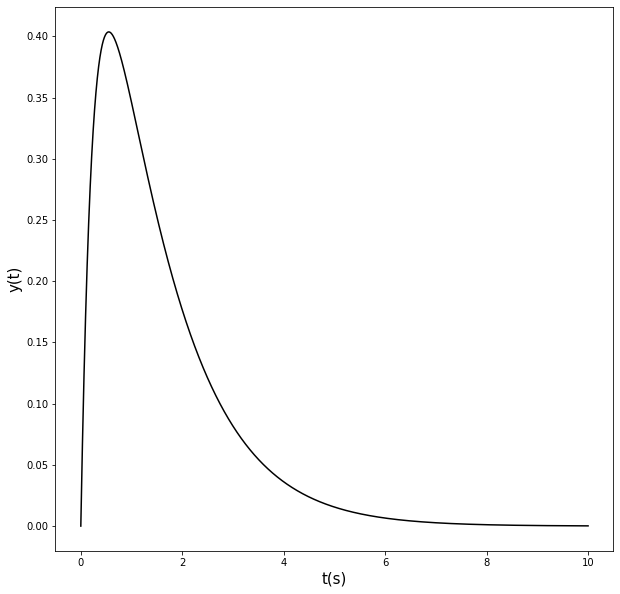

In [30]:
A = np.matrix([[0,1],[-4,-5]])
B = np.matrix([[0],[1/4]])
C = [13,9]
D = [0]
sys4 = ctrl.ss2tf(A,B,C,D)
T = np.arange(0,10,0.001)
U = np.exp(-T)
y=ctrlmatlab.lsim(sys4,U,T)
plt.plot(T,y[0],'k')
plt.xlabel('t(s)',fontsize=15)
plt.ylabel('y(t)',fontsize=15)
plt.rcParams["figure.figsize"] = (10,10)
plt.rc('legend', fontsize=15)
plt.savefig("4output.eps",format='eps')

### Code to simulate the $x_1(t)$ and $x_2(t)$.

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


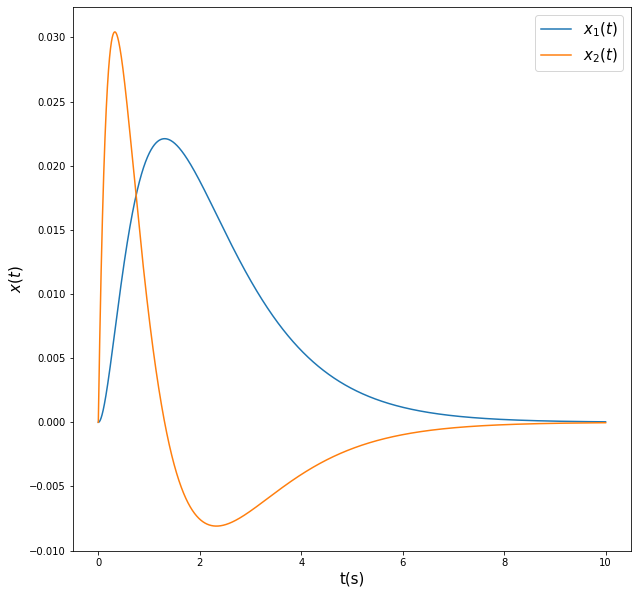

In [31]:
A = np.matrix([[0,1],[-4,-5]])
B = np.matrix([[0],[1/4]])
C = [13,9]
D = [0]
sys4 = ctrl.ss(A,B,C,D)
T = np.arange(0,10,0.001)
U = np.exp(-T)
y=ctrlmatlab.lsim(sys4,U,T)
x1 = []
x2 = []
for i in range(0,len(y[2])):  
  x1.append(y[2][i][0])
  x2.append(y[2][i][1])
plt.plot(T,x1,label='$x_1(t)$')
plt.plot(T,x2,label='$x_2(t)$')
plt.xlabel('t(s)',fontsize=15)
plt.ylabel('$x(t)$',fontsize=15)
plt.rcParams["figure.figsize"] = (10,10)
plt.rc('legend', fontsize=15)
plt.legend()
plt.savefig("4stateplot.eps",format='eps')

# **Exercise 5**
Find the inverse Laplace transform by hand calculations and verify your results using the Symbolic toolbox for the following functions: 

---
1. $F_1(s)=\cfrac{s-10}{(s+2)(s+5)}$ 
2. $F_2(s)=\cfrac{100}{(s+1)(s^2+4s+13)}$
3. $F_3(s)=\cfrac{s+18}{s(s+3)^2}$ 





## Initializate the symbolic lib.

In [0]:
import sympy as sp
s, t,alfa = sp.symbols('s,t,alfa')
t = sp.Symbol('t', positive=True)

## Code to the first item:

In [33]:
expression = (s-10)/((s+2)*(s+5))
sp.inverse_laplace_transform(expression, s, t)

(-4*exp(3*t) + 5)*exp(-5*t)

## Code to the second item:

In [34]:
expression = 100/((s+1)*((s**2)+(4*s)+13))
sp.inverse_laplace_transform(expression, s, t)

10*exp(-t) - 10*exp(-2*t)*sin(3*t)/3 - 10*exp(-2*t)*cos(3*t)

## Code to the third item:

In [35]:
expression = (s+18)/(s*(s+3)**2)
sp.inverse_laplace_transform(expression, s, t)

(-5*t + 2*exp(3*t) - 2)*exp(-3*t)